# Import library

In [1]:
import sys
import os
from tqdm import tqdm
from glob import glob
import random
import tensorflow as tf
import pandas as pd

# Parser function

In [2]:
def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def make_example(img_str, label):
    feature = {'image': _bytes_feature(img_str),
                'label': _bytes_feature(label)}
    return tf.train.Example(features=tf.train.Features(feature=feature))

# Dataframe Sampling function

In [3]:
def sampling_data(df, label, frac):        
    df_label = df[df['labels']==label]
    df_yes_label = df_label.sample(frac=frac)
    
    df_not_label = df[df['labels']!=label]

    df = pd.concat([df_not_label, df_yes_label])

    df = df.sample(frac=1).reset_index(drop = True)

    return df


# Make Data from csvs

In [4]:
class_name = ['roofed house', 'tower', 'building', 'tree', 'park', 'bridge', 'statue', 'marketplace']
class_name_kor = ['기와집', '탑', '빌딩', '나무', '정원', '다리', '동상', '시장']

csv_path = '/home/paul025220/AIFFELTHON/data/'
batch_size = 16

In [5]:
csv_path_list = glob(csv_path+'*.csv')
print("CSV 모음 :", csv_path_list)

data_origin = pd.read_csv(csv_path_list[0])
for path in csv_path_list[1:]:
    df = pd.read_csv(path)
    data_origin = pd.concat([data_origin, df])
    
data_origin = data_origin[['labels', 'data_path']].reset_index(drop = True)
data_origin_len = int(len(data_origin))
print("\nSampling 전 Data 개수 :",  data_origin_len)
display(data_origin.head())
display(data_origin.tail())

CSV 모음 : ['/home/paul025220/AIFFELTHON/data/부산광역시_004.csv', '/home/paul025220/AIFFELTHON/data/광주광역시.csv', '/home/paul025220/AIFFELTHON/data/인천광역시.csv', '/home/paul025220/AIFFELTHON/data/부산광역시_002.csv', '/home/paul025220/AIFFELTHON/data/부산광역시_003.csv', '/home/paul025220/AIFFELTHON/data/서울특별시.csv', '/home/paul025220/AIFFELTHON/data/부산광역시_001.csv', '/home/paul025220/AIFFELTHON/data/울산_대구_대전_제주.csv']

Sampling 전 Data 개수 : 622926


,labels,data_path
0,5,data/Landmark/부산광역시/우동항/우동항_214_38058809.jpg
1,5,data/Landmark/부산광역시/우동항/우동항_202_38058764.jpg
2,5,data/Landmark/부산광역시/우동항/우동항_207_38058785.jpg
3,5,data/Landmark/부산광역시/우동항/우동항_203_38058769.jpg
4,5,data/Landmark/부산광역시/우동항/우동항_193_38058724.jpg


,labels,data_path
622921,6,data/Landmark/Ulsan/구강서원/구강서원_060_35480346.jpg
622922,6,data/Landmark/Ulsan/구강서원/구강서원_041_35480303.jpg
622923,0,data/Landmark/Ulsan/구강서원/구강서원_092_35480406.jpg
622924,6,data/Landmark/Ulsan/구강서원/구강서원_117_35480449.jpg
622925,6,data/Landmark/Ulsan/구강서원/구강서원_036_35480289.jpg


## Visualize

기와집 : 21639
탑 : 4403
빌딩 : 360461
나무 : 2557
정원 : 112484
다리 : 15359
동상 : 9396
시장 : 27205


<AxesSubplot:xlabel='labels'>

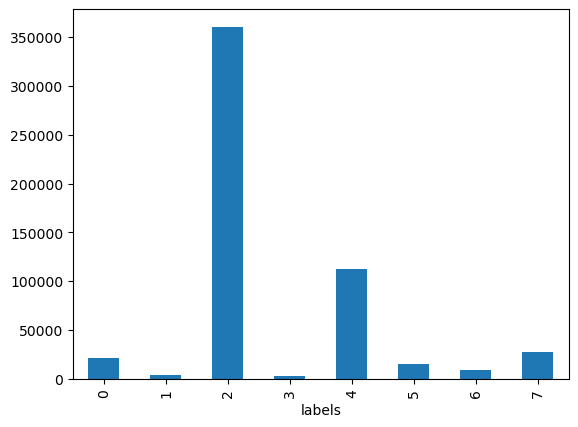

In [6]:
data_origin_groupby = data_origin.groupby(['labels'])['data_path'].nunique()
list_data_origin = list(data_origin_groupby)
for i, value in enumerate(list_data_origin):
    print(class_name_kor[i], ":" , value)

data_origin_groupby.plot.bar(x = 'labels')

# Sampling Data

In [7]:
# label 2 : 10%, 4 : 25% 

sampled_data = sampling_data(data_origin, 2, 0.1)
data = sampling_data(sampled_data, 4, 0.25)

data_len = int(len(data))
print("\nSampling 후 Data 개수 :",  data_len)
display(data.head())
display(data.tail())


Sampling 후 Data 개수 : 160108


,labels,data_path
0,6,data/Landmark/서울특별시/국립서울현충원_충혼승천상/국립서울현충원_충혼승천...
1,4,data/Landmark/Gwangju/당산어린이공원/당산어린이공원_1_089_0.jpg
2,4,data/Landmark/Gwangju/산정공원/산정공원_063_0.JPG
3,0,data/Landmark/부산광역시/동래읍성역사관/동래읍성역사관_097_353799...
4,7,data/Landmark/Jeju/서귀포향토오일시장/서귀포향토오일시장_261_419...


,labels,data_path
160103,0,data/Landmark/Daegu/진주강씨모열각/진주강씨모열각_069_365185...
160104,2,data/Landmark/Incheon/인천개항박물관/인천개항박물관_051_3376...
160105,0,data/Landmark/서울특별시/전쟁과여성인권박물관/20210523_174728...
160106,7,data/Landmark/서울특별시/롯데월드_머킹의회전목마/머킹의 회전목마_020_...
160107,4,data/Landmark/서울특별시/난지천공원_유아놀이터/난지천공원_유아놀이터_11...


## Visualize

기와집 : 21639
탑 : 4403
빌딩 : 40839
나무 : 2557
정원 : 29742
다리 : 15359
동상 : 9396
시장 : 27205


<AxesSubplot:xlabel='labels'>

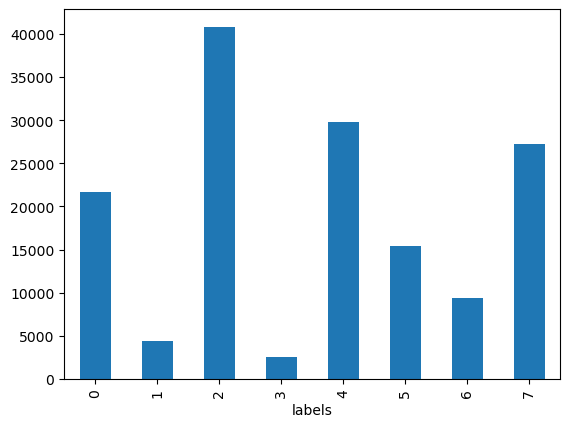

In [8]:
data_groupby = data.groupby(['labels'])['data_path'].nunique()
list_data = list(data_groupby)
for i, value in enumerate(list_data):
    print(class_name_kor[i], ":" , value)

data_groupby.plot.bar(x = 'labels')

# make tf.record

In [9]:
split_idx = int(data_len*0.9 - data_len*0.9%batch_size)

print("data_len : ", data_len)
print("split_idx : ", split_idx)

# train_data (90%)
train_data = data[:split_idx]

train_file_names = train_data['data_path'].tolist()
train_labels = train_data['labels'].tolist()

# validation_data (10%)
val_data = data[split_idx + (data_len - split_idx)%batch_size:]

val_file_names = val_data['data_path'].tolist()
val_labels = val_data['labels'].tolist()

data_len :  160108
split_idx :  144096


In [10]:
with tf.io.TFRecordWriter('/home/paul025220/AIFFELTHON/data/train.tfrecord') as writer:
    for index, (file_name, label) in tqdm(enumerate(zip(train_file_names, train_labels))) :
        file_path = file_name

        label = tf.keras.utils.to_categorical(label, num_classes=8, dtype = 'float64')
        label = label.tobytes()

        tf_example = make_example(img_str=open(file_path, 'rb').read(), label=label)
        writer.write(tf_example.SerializeToString())

# write test dataset tfrecord
with tf.io.TFRecordWriter('/home/paul025220/AIFFELTHON/data/val.tfrecord') as writer :
    for index, (file_name, label) in tqdm(enumerate(zip(val_file_names, val_labels))) :
        file_path = file_name

        label = tf.keras.utils.to_categorical(label, num_classes=8, dtype = 'float64')
        label = label.tobytes()

        tf_example = make_example(img_str=open(file_path, 'rb').read(), label=label)
        writer.write(tf_example.SerializeToString())

0it [00:00, ?it/s]2022-12-10 08:41:45.207717: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 08:41:45.935638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14173 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0
144096it [02:35, 924.02it/s] 
16000it [00:14, 1068.05it/s]
